In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


Column: Unnamed: 0, Min: 0, Max: 401219
Column: 0, Min: 0.03515625, Max: 1.0058594
Column: 1, Min: -1.0, Max: 1.0
Column: 2, Min: -2.8574219, Max: 2.8574219


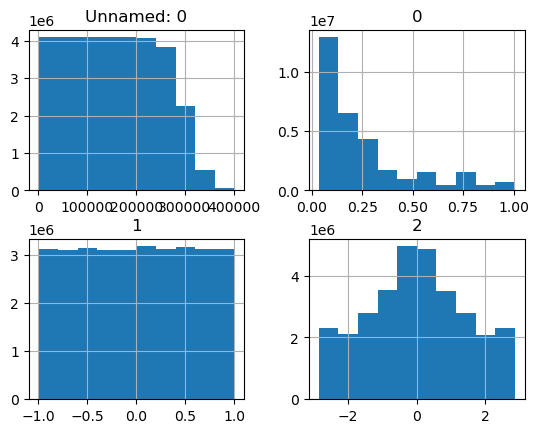

In [7]:

# Specify the file path of the CSV file
file_path = "../input.csv"

# Read the CSV file into a pandas dataframe
df = pd.read_csv(file_path)

# Get histograms of the columns in the dataframe
histograms = df.hist()

# Print the minimum and maximum values of the histograms
for column in df.columns:
    column_min = df[column].min()
    column_max = df[column].max()
    print(f"Column: {column}, Min: {column_min}, Max: {column_max}")

# Display the histograms
plt.show()


Unnamed: 0
Skipping Unnamed: 0
0
Column: 0, Min: -0.26718655, Max: 0.0663522, Radii: 4.222009493670886


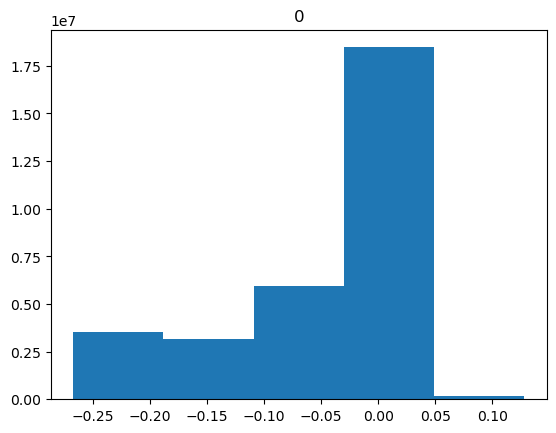

1
Column: 1, Min: -0.1425626, Max: 0.0900857, Radii: 2.9449151898734183


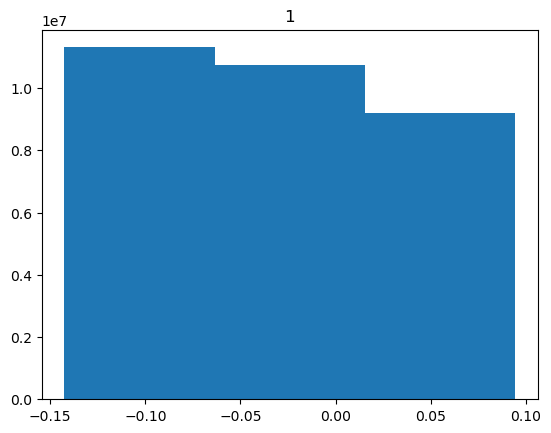

2
Column: 2, Min: -0.11624335, Max: 0.11342672, Radii: 2.9072160759493673


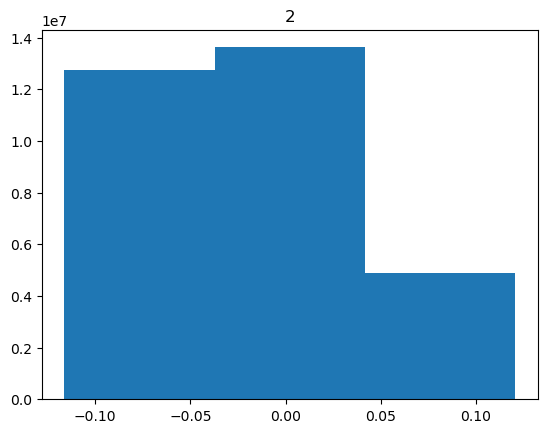

3
Column: 3, Min: -0.40831777, Max: 0.2437301, Radii: 8.253770506329115


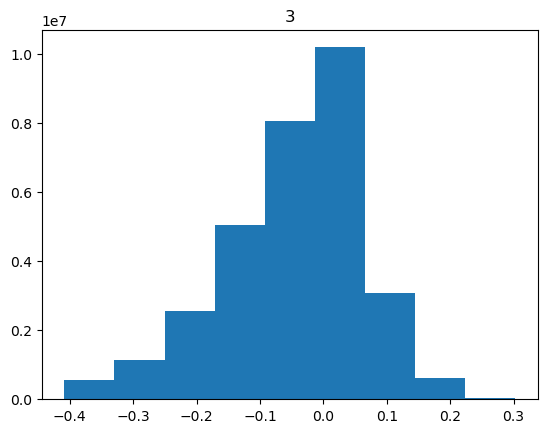

4
Column: 4, Min: -0.07535616, Max: 0.06275063, Radii: 1.7481872151898734


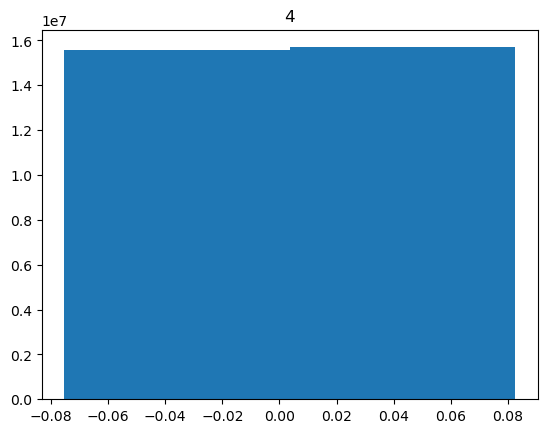

5
Column: 5, Min: -0.07099271, Max: 0.07844983, Radii: 1.8916777215189875


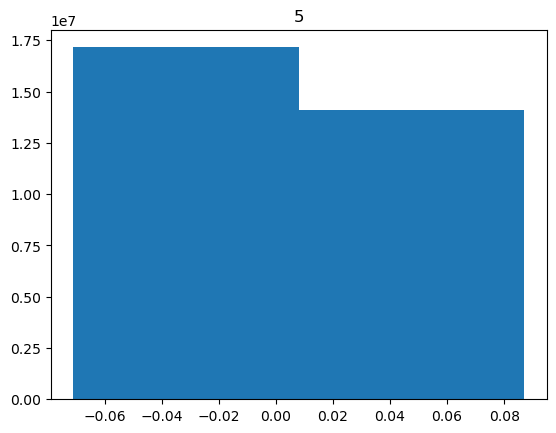

6
Column: 6, Min: -0.36202818, Max: 0.22777693, Radii: 7.465887468354429


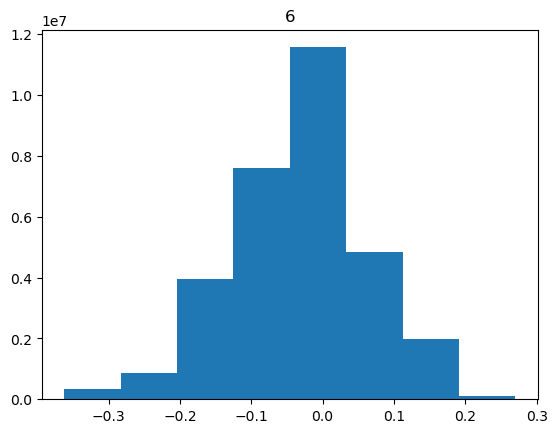

7
Column: 7, Min: -0.51255584, Max: 0.3925031, Radii: 11.456442278481012


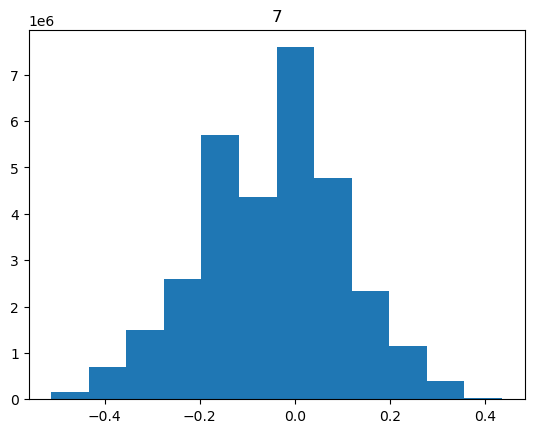

8
Column: 8, Min: -0.2087763, Max: 0.24052098, Radii: 5.6873073417721525


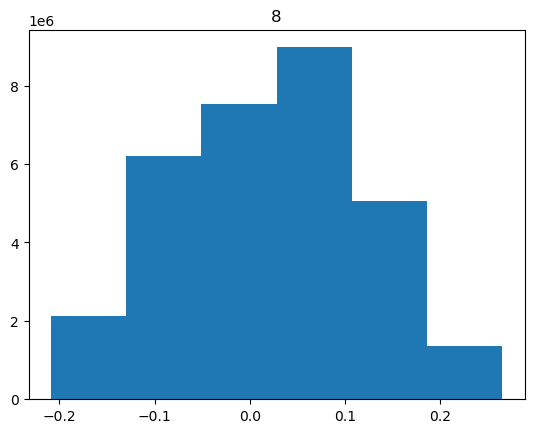

9
Column: 9, Min: -0.4130737, Max: 0.4401317, Radii: 10.80006835443038


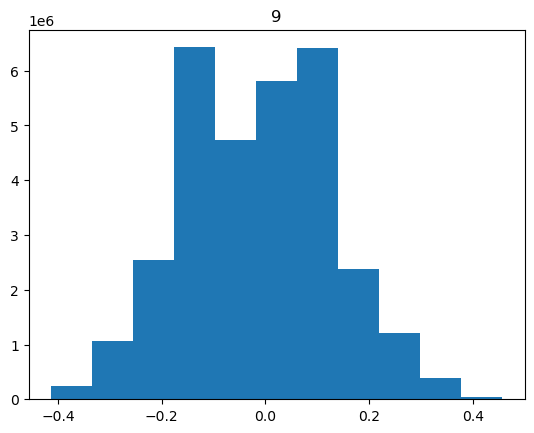

10
Column: 10, Min: -0.54531634, Max: 0.46127945, Radii: 12.741718860759493


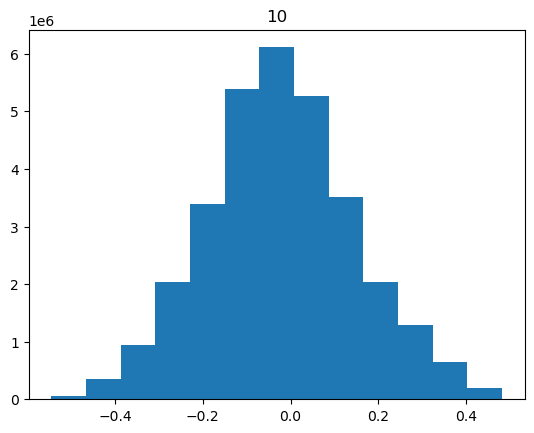

11
Column: 11, Min: -0.23054738, Max: 0.48487443, Radii: 9.055972278481013


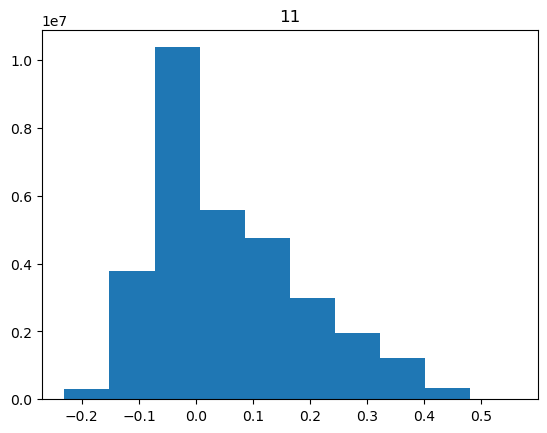

In [2]:
# Specify the file path of the CSV file
file_path = "../output.csv"
radius = 0.079

# Read the CSV file into a pandas dataframe
df = pd.read_csv(file_path) #, nrows=1000)

# Get histograms of the columns in the dataframe
#histograms = df.hist()

# Print the minimum and maximum values of the histograms
mins = []
maxs = []
rads = []
for column in df.columns:
    print(column)
    
    if(column == "Unnamed: 0"):
        print("Skipping Unnamed: 0")
        continue
    column_min = df[column].min()
    mins.append(column_min)
    column_max = df[column].max()
    maxs.append(column_max)
    radii = (column_max - column_min) / radius
    rads.append(radii)
    print(f"Column: {column}, Min: {column_min}, Max: {column_max}, Radii: {radii}")
    data=df[column]
    plt.hist(data, bins=np.arange(min(data), max(data) + radius, radius))  
    plt.title(column)
    plt.show()     

# Display the histograms



In [3]:
columns_to_split = [7, 9, 10] # radii from above fits 12, 11, 13 times
columns_to_split_str = ["7", "9", "10"]
buckets = np.zeros((math.ceil(rads[columns_to_split[0]]),
                    math.ceil(rads[columns_to_split[1]]),
                    math.ceil(rads[columns_to_split[2]])))
bucket = [0, 0, 0]
for ind in df.index:
    #if (ind > 1000):
    #    continue
    # create bucket index
    for i in range(len(columns_to_split)):
        #print(df[columns_to_split_str[i]][ind], mins[columns_to_split[i]])
        bucket[i] =math.floor((df[columns_to_split_str[i]][ind] - mins[columns_to_split[i]]) / radius)
    #print(bucket)
    buckets[bucket[0]][bucket[1]][bucket[2]] += 1
    if(ind % 100000 == 0):
        print(ind)
#print(buckets)

# we are looking at 102 events, so we divide buckets by 102
buckets = buckets / 102
max_val = np.amax(buckets)
min_val = np.amin(buckets)
mean = np.mean(buckets)
std = np.std(buckets)
print(f"Max: {max_val}, Min: {min_val}, Mean: {mean}, Std: {std}")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000


KeyboardInterrupt: 

In [5]:
correlations = df.corr()
print(correlations)


            Unnamed: 0         0         1         2         3         4  \
Unnamed: 0    1.000000 -0.224953 -0.004219 -0.003991  0.181230 -0.502421   
0            -0.224953  1.000000  0.000535 -0.008507 -0.338005 -0.006763   
1            -0.004219  0.000535  1.000000  0.043798 -0.000940 -0.001628   
2            -0.003991 -0.008507  0.043798  1.000000 -0.000340 -0.002671   
3             0.181230 -0.338005 -0.000940 -0.000340  1.000000  0.022039   
4            -0.502421 -0.006763 -0.001628 -0.002671  0.022039  1.000000   
5            -0.008400  0.147428 -0.027832  0.354760 -0.001190  0.000902   
6             0.049580 -0.304829 -0.000714  0.000647  0.113144  0.069516   
7             0.001823 -0.020965  0.078739 -0.006719  0.007619 -0.000835   
8            -0.057007 -0.189261  0.006336 -0.006592 -0.216654 -0.003875   
9             0.006460 -0.014913 -0.025704 -0.011236  0.009155 -0.001762   
10            0.006727  0.013870 -0.028182 -0.114619  0.009243 -0.002719   
11          

In [11]:

# Get the absolute values of correlations and unstack the dataframe
abs_correlations = correlations.abs().unstack()

# Sort the absolute correlations in ascending order
sorted_correlations = abs_correlations.sort_values()

# Get the 3 smallest absolute correlations
smallest_correlations = sorted_correlations[:40:2]

print(smallest_correlations)



11  1             0.000126
5   8             0.000295
2   3             0.000340
1   0             0.000535
2   6             0.000647
6   1             0.000714
4   7             0.000835
5   6             0.000880
    4             0.000902
3   1             0.000940
6   10            0.001118
3   5             0.001190
11  4             0.001193
4   1             0.001628
    9             0.001762
7   Unnamed: 0    0.001823
6   7             0.002172
2   11            0.002370
4   2             0.002671
    10            0.002719
dtype: float64


In [74]:
buckets_reshaped = buckets.reshape(-1)
sorted_index_array = np.argsort(buckets_reshaped) 
buckets_sorted = buckets_reshaped[sorted_index_array]
#print(sorted_index_array)
rslt = buckets_sorted[900:1000]
#print(rslt)

# calculate actual inference cost (only block by block, neighborhoods are not considered; so it is optimistic)
comparisons = 0
for i in (buckets_sorted):
    comparisons += i*i
print(comparisons)

505522405.86361027


In [75]:
columns_to_split = [1, 4, 5] # radii from above fits 12, 11, 13 times
columns_to_split_str = ["1", "4", "5"]
buckets = np.zeros((math.ceil(rads[columns_to_split[0]]),
                    math.ceil(rads[columns_to_split[1]]),
                    math.ceil(rads[columns_to_split[2]])))
bucket = [0, 0, 0]
for ind in df.index:
    #if (ind > 1000):
    #    continue
    # create bucket index
    for i in range(len(columns_to_split)):
        #print(df[columns_to_split_str[i]][ind], mins[columns_to_split[i]])
        bucket[i] =math.floor((df[columns_to_split_str[i]][ind] - mins[columns_to_split[i]]) / radius)
    #print(bucket)
    buckets[bucket[0]][bucket[1]][bucket[2]] += 1
    if(ind % 100000 == 0):
        print(ind)
#print(buckets)

# we are looking at 102 events, so we divide buckets by 102
buckets = buckets / 102
max_val = np.amax(buckets)
min_val = np.amin(buckets)
mean = np.mean(buckets)
std = np.std(buckets)
print(f"Max: {max_val}, Min: {min_val}, Mean: {mean}, Std: {std}")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000

In [78]:
buckets_reshaped = buckets.reshape(-1)
sorted_index_array = np.argsort(buckets_reshaped) 
buckets_sorted = buckets_reshaped[sorted_index_array]
#print(sorted_index_array)
rslt = buckets_sorted[:100]
#print(rslt)

# calculate actual inference cost (only block by block, neighborhoods are not considered; so it is optimistic)
comparisons = 0
for i in (buckets_sorted):
    comparisons += i*i
print(comparisons)

[21091.24509804 21771.91176471 23589.11764706 23629.40196078
 23688.76470588 23857.14705882 23864.90196078 23873.19607843
 28693.07843137 28875.8627451  31508.08823529 31876.76470588]
7969431897.240774
